In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Discount Cost problem

In [72]:
def g(y, x):
    '''as the name suggests it returns the single stage cost for coming on to the stage x from state y'''
    if(x == 100):
        return 1
    else:
        return 0

def single_stage_reward_expected(i, u, p):
    '''calculates E(g(x, u, w)) basically'''
    return p*(g(i, min(i+u, 100))) + (1-p)*(g(i, max(i-u, 0)))
    
def calc_prev_val_expected(i, u, curr_vals, p):
    '''calculates E(Jn-1(x, u, w)) '''
    return p*(curr_vals[min(i+u, 100)]) + (1-p)*(curr_vals[max(i-u, 0)])

def calc_next_val(i, current_vals, p):
    maxreward = -1 
    bestaction = -1 # whats the best amount to invest among the amounts we caninvest
    # iterate over all actions and choose the one for which the average reward is maximized
    
    if(i==100):
        for u in [0, 1]:
            reward = single_stage_reward_expected(i, u, p) + (calc_prev_val_expected(i, u, current_vals, p))
            #round of reward because otherwise there are numerical precision errors
            reward = round(reward, 5)

            if(reward >= maxreward):
                maxreward = reward
                bestaction = u    
        return maxreward, bestaction
    
    elif(i == 0):
        reward = 0 + 1*current_vals[1]
        
        return reward, 1
        
    else:
        for u in range(0, min(i, 100-i)+1):
            reward = single_stage_reward_expected(i, u, p) + (calc_prev_val_expected(i, u, current_vals, p))
            #round of reward because otherwise there are numerical precision errors
            reward = round(reward, 5)

            if(reward >= maxreward):
                maxreward = reward
                bestaction = u    
        return maxreward, bestaction

def next_val(current_vals, p):
    '''calculate the next vals for all states in an array given the prev vals for all states in an array'''
    next_val = np.zeros((101))
    bestaction = np.zeros((101))
    for i in range(101):
        next_val[i], bestaction[i] = calc_next_val(i, current_vals, p)
#     print(next_val)
    return next_val, bestaction

def get_optimal_averagevalue(current_vals, epsilon, miniter, p):
    converged = False
    bestaction = np.zeros((101))
    next_vals = np.zeros((101))
    numiter = 0
    while(converged == False and numiter<miniter):
        numiter+=1
        current_vals = np.copy(next_vals)
        next_vals, bestaction = next_val(next_vals, p)
#stopping condition - if the current value estimat - prev value estimate < epsilon for all the states
#         if(np.all(np.absolute(next_vals - current_vals) < epsilon)):
#             converged = True
#         print(bestaction)
#         print(next_vals)
#         print(numiter)
    return next_vals/numiter, bestaction

In [73]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
epsilon = 0.0001
p = 0.4
miniter = 10
a, b = get_optimal_averagevalue(current_values, epsilon, miniter, p)

### p=0.4

keeping minimum iterations as 10000

In [78]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
epsilon = 0.0001
p = 0.4
miniter = 10000
optimal_avgreward1a, bestactions1a = get_optimal_averagevalue(current_values, epsilon, miniter, p)

Text(0, 0.5, 'optimal value')

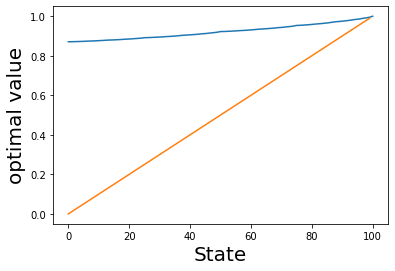

In [79]:
plt.plot(optimal_avgreward1a)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.4iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

[ 1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


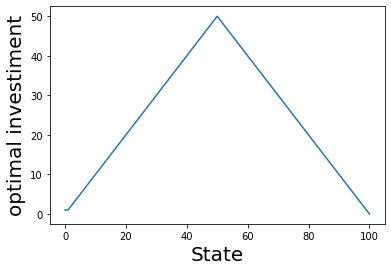

In [80]:
plt.plot(bestactions1a)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
print(bestactions1a)
# plt.savefig('./plots/d1p.4iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### doing for multiple iterations to see convergence

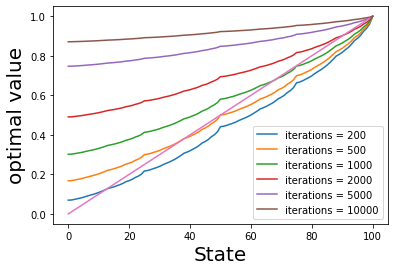

In [81]:
for iterations in [200, 500, 1000, 2000, 5000, 10000]:
    current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
    epsilon = 0.0001
    p = 0.4
    miniter = iterations
    optimal_avgreward, bestactions = get_optimal_averagevalue(current_values, epsilon, miniter, p)
    
    plt.plot(optimal_avgreward, label = 'iterations = {}'.format(iterations))


plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
plt.legend()

### p=0.25

keeping minimum iterations as 10000

In [82]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
epsilon = 0.0001
p = 0.25
miniter = 10000
optimal_avgreward1b, bestactions1b = get_optimal_averagevalue(current_values, epsilon, miniter, p)

Text(0, 0.5, 'optimal value')

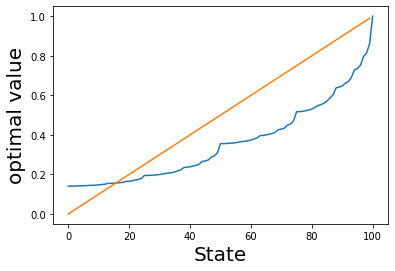

In [83]:
plt.plot(optimal_avgreward1b)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.4iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

[ 1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]


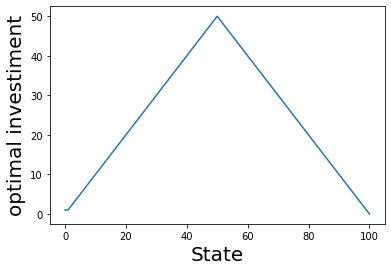

In [84]:
plt.plot(bestactions1b)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
print(bestactions1a)
# plt.savefig('./plots/d1p.4iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### doing for multiple iterations to see convergence

In [ ]:
for iterations in [200, 500, 1000, 2000, 5000, 10000]:
    current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
    epsilon = 0.0001
    p = 0.25
    miniter = iterations
    optimal_avgreward, bestactions = get_optimal_averagevalue(current_values, epsilon, miniter, p)
    
    plt.plot(optimal_avgreward, label = 'iterations = {}'.format(iterations))


plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
plt.legend()

### p=0.55

keeping minimum iterations as 10000

In [ ]:
current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
epsilon = 0.0001
p = 0.55
miniter = 10000
optimal_avgreward1c, bestactions1c = get_optimal_averagevalue(current_values, epsilon, miniter, p)

In [ ]:
plt.plot(optimal_avgreward1c)
plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
# plt.savefig('./plots/d1p.4iter200optivaluevsstate.jpeg', dpi = 300, bbox_inches = 'tight')

In [ ]:
plt.plot(bestactions1c)
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal investiment', fontsize = 20)
print(bestactions1c)
# plt.savefig('./plots/d1p.4iter200optiinvestvsstate.jpeg', dpi = 300, bbox_inches = 'tight')

### doing for multiple iterations to see convergence

In [ ]:
for iterations in [200, 500, 1000, 2000, 5000, 10000]:
    current_values = np.zeros((101)) #We start all the values from 0 ie J(x) = 0 foar all states x, which is a bounded function
    epsilon = 0.0001
    p = 0.55
    miniter = iterations
    optimal_avgreward, bestactions = get_optimal_averagevalue(current_values, epsilon, miniter, p)
    
    plt.plot(optimal_avgreward, label = 'iterations = {}'.format(iterations))


plt.plot([i/100 for i in range(100)])
plt.xlabel('State', fontsize = 20)
plt.ylabel('optimal value', fontsize = 20)
plt.legend()